In [18]:
import os, sys
import numpy as np
import torch
import matplotlib.pyplot as plt
sys.path.insert(0, '../src')
import datasets

# Obtain statistics and easily analyze cinic-10 ImageNet extraction

## Path to dataset + constants

In [6]:
cinic10_imagenet_path = '/n/fs/ac-editing/model-editing/data/cinic-10-imagenet'
available_subdirs = ["train", "test", "valid"]

cifar_mean = [0.4914, 0.4822, 0.4465]
cifar_std = [0.2471, 0.2435, 0.2616]
cinic_mean = [0.47889522, 0.47227842, 0.43047404]
cinic_std = [0.24205776, 0.23828046, 0.25874835]

## Define functions

In [24]:
def summarize_directory(subdir="train"):
    assert subdir in available_subdirs
    subdir_path = os.path.join(cinic10_imagenet_path, subdir)
    print("Statistics for {}:".format(subdir_path))
    n_total_images = 0
    for class_name in os.listdir(subdir_path):
        if ".ipynb" in class_name:
            continue
        class_dir = os.path.join(subdir_path, class_name)
        
        n_images = len(os.listdir(class_dir))
        n_total_images += n_images
        print("{} images for class {}".format(n_images, class_dir))
    
    print("{} images in {} split".format(n_total_images, subdir))

## Run `summarize_directory()` on train, val, and test

In [ ]:
for subdir in available_subdirs:
    summarize_directory(subdir)
print(os.listdir(os.path.join(cinic10_imagenet_path, 'train')))

## Test dataloader for CINIC-10 ImageNet

In [24]:
train_dataset = datasets.get_dataset(
    dataset_path=cinic10_imagenet_path,
    split='train',
    normalize=False,
    mean=cinic_mean,
    std=cinic_std)

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=5,
    shuffle=False,
    num_workers=8,
    drop_last=False)

/n/fs/ac-editing/model-editing/helpers
torch.Size([5, 3, 32, 32])
tensor(1.)
tensor(0.0078)
torch.Size([5, 3, 32, 32])
tensor(1.)
tensor(0.0235)
torch.Size([5, 3, 32, 32])
tensor(1.)
tensor(0.0039)


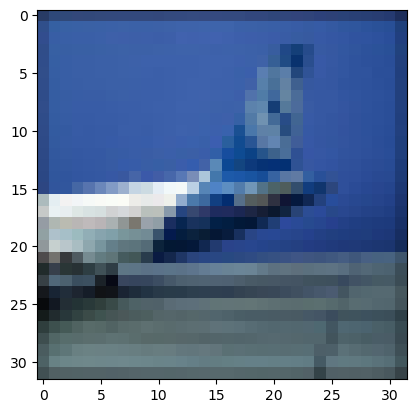

In [25]:
print(os.getcwd())
for idx, (image, label) in enumerate(train_dataloader):
    image0 = image[0]
    print(image.shape)
    print(torch.max(image))
    print(torch.min(image))
    plt.imshow(image0.permute(1, 2, 0))
    if idx == 2:
        break
    

True


FileNotFoundError: [Errno 2] No such file or directory: '/n/fs/ac-editing/model-editing/data/cinic-10-imagenet/train/airplane/n02686121_10018.png'